### Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import pickle
import matplotlib.pyplot as plt
import cv2
# import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import os
from cv2 import xfeatures2d
import time 
from sklearn.neighbors import KNeighborsClassifier
from pathlib import Path
from keras.preprocessing.image import load_img
import warnings
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img


2023-07-28 17:19:47.065269: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# pip install keras
# pip install tensorflow

### Data

In [3]:
for dirname, _, filenames in os.walk('./monkey'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
root = "./data/monkey"
train_dir = Path(f'{root}/training/training/')
test_dir = Path(f'{root}/validation/validation/')

In [5]:
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
label_df = pd.read_csv(f"{root}/monkey_labels.txt", names=cols, skiprows=1)
label_df

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [6]:
def image_show(num_image,label):
    for i in range(num_image):
        imgdir = Path(f'{root}/training/training/' + label)
        imgfile = random.choice(os.listdir(imgdir))
        img = cv2.imread(f'{root}/training/training/'+ label +'/'+ imgfile)
        plt.figure(i)
        plt.imshow(img)
        plt.title(imgfile)
    plt.show()

In [7]:
labels = label_df['Common Name']

 pygmy_marmoset                


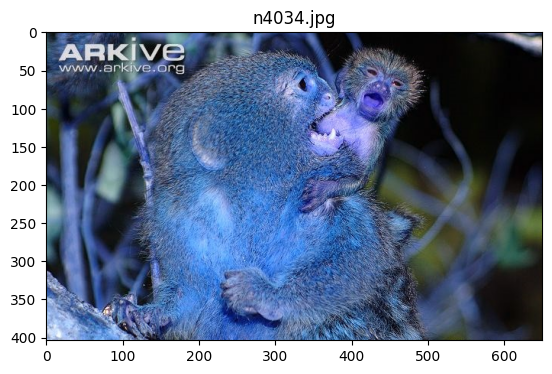

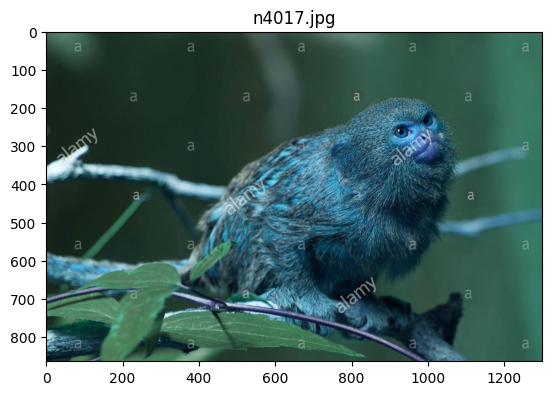

In [8]:
print(labels[4])
image_show(2,'n4')

 white_headed_capuchin         


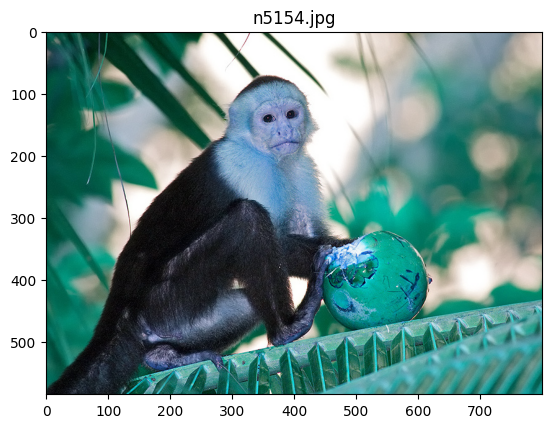

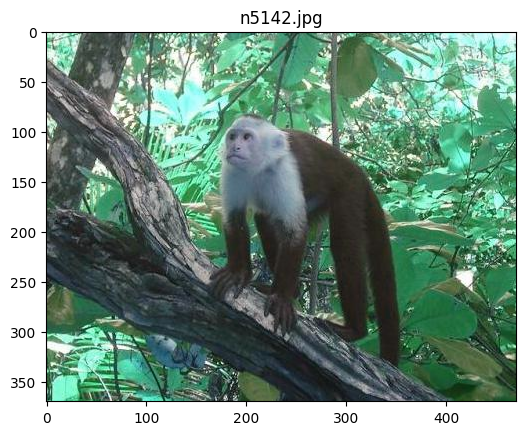

In [9]:
print(labels[5])
image_show(2,'n5')

### Data Preprocessing

In [10]:
def load_train_test_data(path_to_data= root):
    y_train = []
    X_train = []
    y_test = []
    X_test = []
    for i,f in enumerate(os.listdir(train_dir)):
        if 'n' in f:
            for j in os.listdir(Path(f"{train_dir}/{f}")):
                y_train.append(i)
                img = load_img(Path(f"{train_dir}/{f}/{j}"))
                img_numpy_array = img_to_array(img)
                X_train.append(img_numpy_array)
    
    for i,f in enumerate(os.listdir(test_dir)):
        if 'n' in f:
            for j in os.listdir(Path(f"{test_dir}/{f}")):
                y_test.append(i)
                img = load_img(Path(f"{test_dir}/{f}/{j}"))
                img_numpy_array = img_to_array(img)
                X_test.append(img_numpy_array)

    return X_train, y_train, X_test, y_test

In [11]:
X_train, y_train, X_test, y_test = load_train_test_data()

In [14]:
len(y_train),len(X_train)

(1098, 1098)

In [15]:
len(y_test),len(X_test)

(272, 272)